In [1]:
import sys
sys.path.insert(0, '../src')

from megs.model.mPCA import mPCA
from megs.data import image, DataLoader, Galaxy

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np
import pickle
from tqdm import trange
import seaborn as sns
sns.set_context("paper", font_scale=1.5)


In [2]:
# Load model from pickle
with open("2dmodel60.pkl", 'rb') as f:
    mm = pickle.load(f)

In [3]:
scores = mm.get_scores()
eigengalaxies = mm.get_eigengalaxies()
means = mm.get_means()
images = mm.get_images()
rec = mm.inverse_transformed_datamatrix.reshape(-1,3, 64, 64)

In [84]:
# Calculate the indices that sorts the absolute values of the scores
sorted_scores = np.argsort(np.abs(scores), axis=1)

# Get the indices of the 10 largest components per row
top_10_indices = sorted_scores[:, -5:]

# Create a new scores array full of zeros with the same shape as the original scores
new_scores = np.zeros_like(scores)

# Assign the top 10 scores to the corresponding positions in the new_scores array
for i in range(scores.shape[0]):
    new_scores[i, top_10_indices[i]] = scores[i, top_10_indices[i]]



Text(0, 0.5, 'Umap 2')

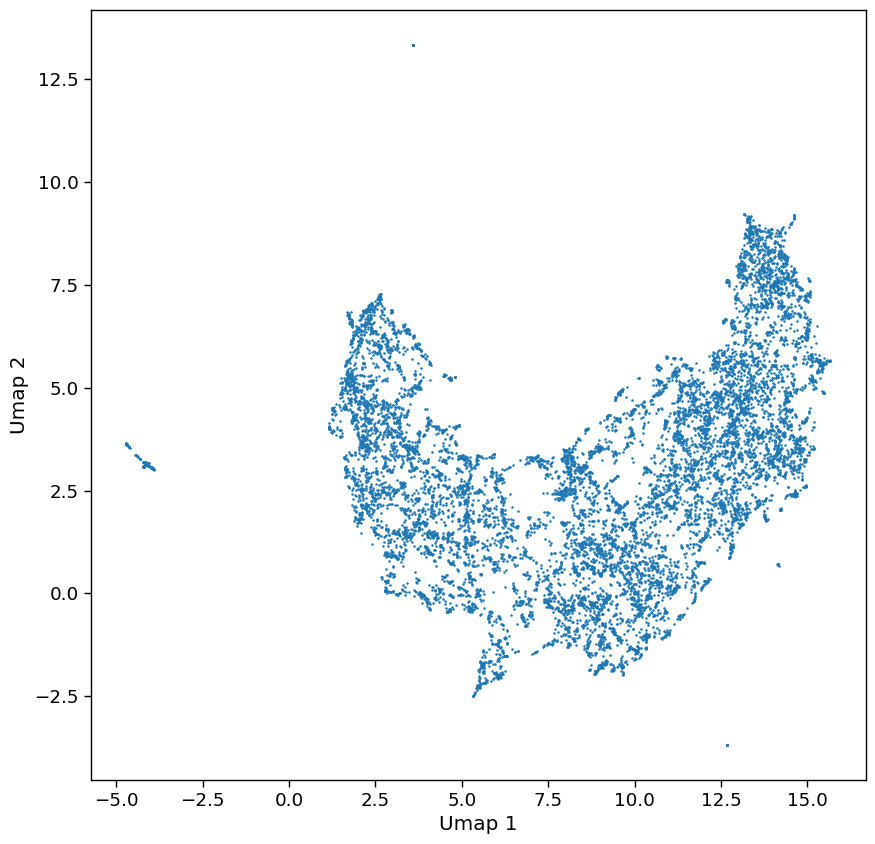

In [85]:
# Calculate UMAP embedding
from umap import UMAP

umap = UMAP(n_components=2, n_neighbors=5, min_dist=0.0001, metric='euclidean')
umap_embedding = umap.fit_transform(new_scores)


# Plot the embedding
plt.figure(figsize=(10,10))
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], s=1)
plt.xlabel("Umap 1")
plt.ylabel("Umap 2")

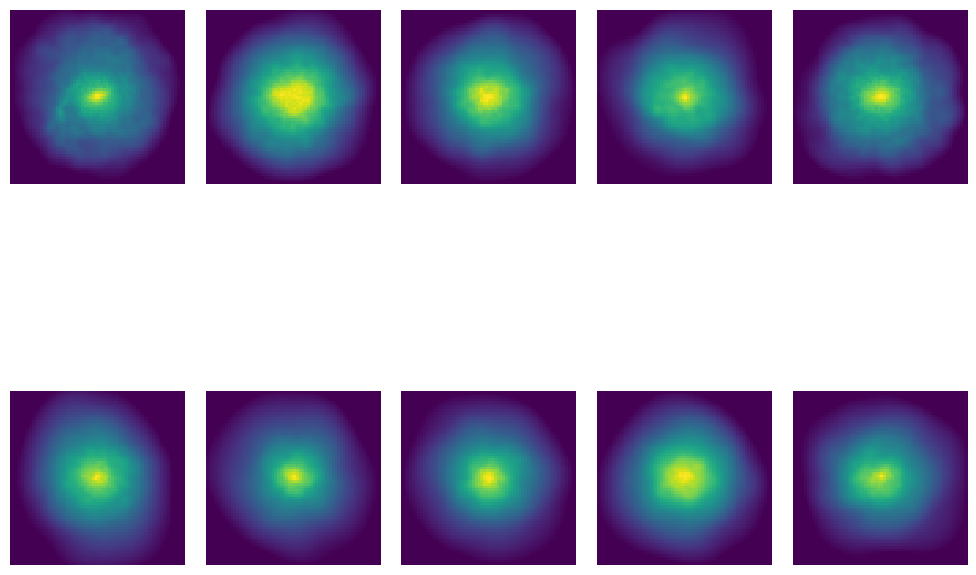

In [78]:
# Show images with umap1 > 7
index = np.where(umap_embedding[:,1] > 10)[0]

fig, ax = plt.subplots(2, 5, figsize=(10, 10))

for i,axes in enumerate(ax.flatten()):
    # choose a random index
    rdm = np.random.randint(0, len(index))
    axes.imshow(images[index[rdm]][2])
    axes.axis('off')
    
plt.tight_layout()

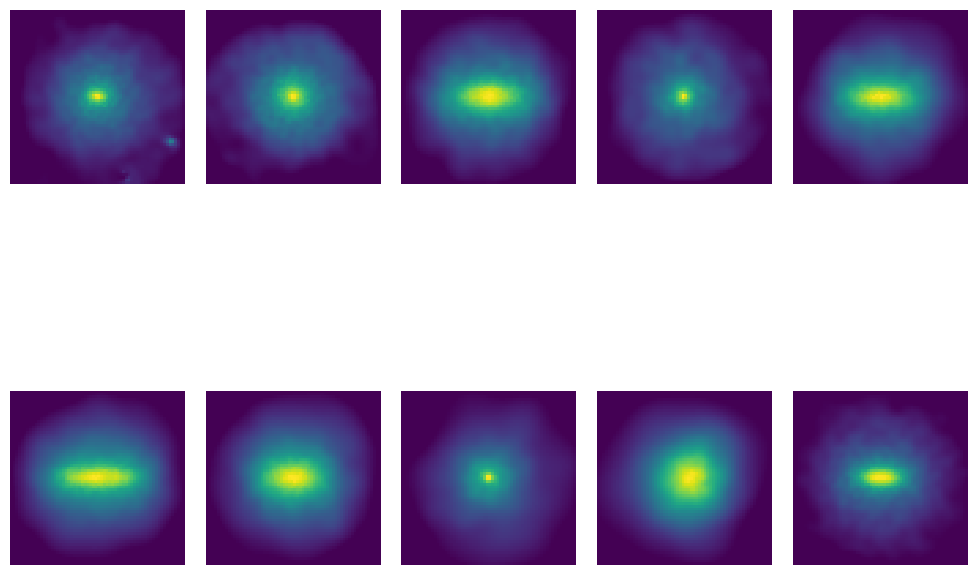

In [81]:
# Show images with umap1 > 7
index = np.where(umap_embedding[:,1] < 1)[0]

fig, ax = plt.subplots(2, 5, figsize=(10, 10))

for i,axes in enumerate(ax.flatten()):
    axes.imshow(images[index[i]][2])
    axes.axis('off')
    
plt.tight_layout()